# Exercise #6 - Sergei Neznanov

In [4]:
import pandas as pd
import numpy as np
import os
import statsmodels.formula.api as smf
import scipy.stats
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import pandasql
import gc
from datetime import datetime
import warnings

## 1. TRACE - Corporate Bonds

In [18]:
warnings.filterwarnings('ignore')
infile='enhanced_trace_2021_09_30.csv'
trace=pd.read_csv(infile)

trace.head(10)

,cusip_id,bond_sym_id,company_symbol,trd_exctn_dt,trd_exctn_tm,trd_rpt_dt,trd_rpt_tm,msg_seq_nb,trc_st,scrty_type_cd,...,sub_prdct,stlmnt_dt,trd_mod_3,trd_mod_4,rptg_party_type,lckd_in_ind,ats_indicator,pr_trd_dt,first_trade_ctrl_date,first_trade_ctrl_num
0,P0929YAA4,NaN,NaN,20210930,15:51:00,20210930,16:37:35,137111,T,NaN,...,CORP,20211014,NaN,NaN,D,NaN,NaN,NaN,20210930,137111
1,P0929YAA4,NaN,NaN,20210930,15:51:11,20210930,17:00:23,144757,T,NaN,...,CORP,20211014,NaN,NaN,D,NaN,NaN,NaN,20210930,144757
2,P0929YAA4,NaN,NaN,20210930,16:07:51,20210930,16:41:17,138066,T,NaN,...,CORP,20211014,Z,NaN,D,NaN,NaN,NaN,20210930,138066
3,P0929YAA4,NaN,NaN,20210930,16:07:51,20210930,16:42:46,138066,C,NaN,...,CORP,20211014,Z,NaN,D,NaN,NaN,NaN,20210930,138066
4,P0929YAA4,NaN,NaN,20210930,16:07:51,20210930,16:42:46,138230,R,NaN,...,CORP,20211014,Z,NaN,D,NaN,NaN,20210930.0,20210930,138066
5,P0929YAA4,NaN,NaN,20210930,16:07:51,20210930,16:44:17,138230,C,NaN,...,CORP,20211014,Z,NaN,D,NaN,NaN,20210930.0,20210930,138066
6,P0929YAA4,NaN,NaN,20210930,16:07:51,20210930,16:44:17,138319,R,NaN,...,CORP,20211014,Z,NaN,D,NaN,NaN,20210930.0,20210930,138066
7,P0929YAA4,NaN,NaN,20210930,16:07:51,20210930,16:45:26,138319,X,NaN,...,CORP,20211014,Z,NaN,D,NaN,NaN,20210930.0,20210930,138066
8,P0929YAA4,NaN,NaN,20210930,16:07:51,20210930,16:46:33,138640,T,NaN,...,CORP,20211014,NaN,NaN,D,NaN,NaN,NaN,20210930,138640
9,P0929YAA4,NaN,NaN,20210930,16:07:59,20210930,16:56:31,143487,T,NaN,...,CORP,20211014,NaN,NaN,D,NaN,NaN,NaN,20210930,143487


### (a) How many corporate bond trades were there.

In [12]:
print("The number of corporate bond trades is",len(trace))

The number of corporate bond trades is 120286


### (b) How many CUSIPs traded.

In [11]:
cusip_count=trace['cusip_id'].nunique()
print("Different CUSIPs traded  = ",cusip_count)

Different CUSIPs traded  =  10397


### (c) What was the dollar par volume traded.

In [19]:
trace.dtypes

cusip_id                  object
bond_sym_id               object
company_symbol            object
trd_exctn_dt               int64
trd_exctn_tm              object
trd_rpt_dt                 int64
trd_rpt_tm                object
msg_seq_nb                 int64
trc_st                    object
scrty_type_cd            float64
wis_fl                    object
cmsn_trd                  object
entrd_vol_qt             float64
rptd_pr                  float64
yld_sign_cd               object
yld_pt                   float64
asof_cd                  float64
days_to_sttl_ct          float64
sale_cndtn_cd            float64
sale_cndtn2_cd           float64
rpt_side_cd               object
buy_cmsn_rt              float64
buy_cpcty_cd              object
sell_cmsn_rt             float64
sell_cpcty_cd             object
cntra_mp_id               object
agu_qsr_id               float64
spcl_trd_fl               object
trdg_mkt_cd               object
dissem_fl                 object
orig_msg_s

In [20]:
trace.rename(columns={'rptd_pr':'tprice','entrd_vol_qt':'volume','ATS_indicator':'ats_indicator'},inplace=True)
volume_tot = trace['volume'].sum()
ats_trades = trace.query('ats_indicator == "Y"')
n_trades_ats = ats_trades['volume'].count()
volume_tot_ats = ats_trades['volume'].sum()
print('ATS par volume $bn = ',(1/1000000000)*volume_tot_ats)

ATS par volume $bn =  5.855521376780001


### (d) What was the average trade size.

In [22]:
volume_tot = trace['volume'].sum()
n_trades = trace['volume'].count()
print('Average trade size $mn = ',(1/1000000)*volume_tot/n_trades)

Average trade size $mn =  0.4542471734304906


### (e) What was the par volume on customer transactions (Contra Party Indicator = C).

In [24]:
trace['cntra_mp_id'].value_counts()

D    59710
C    52697
A     4849
T     3030
Name: cntra_mp_id, dtype: int64

In [25]:
volume_tot = trace['volume'].sum()
C_trades = trace.query('cntra_mp_id == "C"')
n_trades_C = C_trades['volume'].count()
volume_tot_C = C_trades['volume'].sum()
print('Customer transactions par volume $bn = ',(1/1000000000)*volume_tot_C)

Customer transactions par volume $bn =  31.533558013959997


### (f) What was the average trade size on customer transactions

In [26]:
n_trades_C = C_trades['volume'].count()
volume_tot_C = C_trades['volume'].sum()
print('Average trade size on customer transactions $mn = ',(1/1000000)*volume_tot_C/n_trades_C)

Average trade size on customer transactions $mn =  0.5983937987733646


### (g) For the CUSIP 48666KAR0, what was the Thompson-Waller bid-ask spread.

In [27]:

trace_data_bond1 = trace.query('cusip_id=="48666KAR0"')
trace_data_bond1.head()

,cusip_id,bond_sym_id,company_symbol,trd_exctn_dt,trd_exctn_tm,trd_rpt_dt,trd_rpt_tm,msg_seq_nb,trc_st,scrty_type_cd,...,sub_prdct,stlmnt_dt,trd_mod_3,trd_mod_4,rptg_party_type,lckd_in_ind,ats_indicator,pr_trd_dt,first_trade_ctrl_date,first_trade_ctrl_num
72803,48666KAR0,KBH3881674,KBH,20210930,8:41:14,20210930,8:41:14,4375,T,NaN,...,CORP,20211004,NaN,NaN,D,NaN,NaN,NaN,20210930,4375
72804,48666KAR0,KBH3881674,KBH,20210930,8:41:14,20210930,8:41:14,4376,T,NaN,...,CORP,20211004,NaN,NaN,D,NaN,NaN,NaN,20210930,4376
72805,48666KAR0,KBH3881674,KBH,20210930,8:41:14,20210930,8:41:18,4383,T,NaN,...,CORP,20211004,NaN,NaN,D,NaN,NaN,NaN,20210930,4383
72806,48666KAR0,KBH3881674,KBH,20210930,8:41:14,20210930,8:41:20,4388,T,NaN,...,CORP,20211004,NaN,NaN,D,NaN,NaN,NaN,20210930,4388
72807,48666KAR0,KBH3881674,KBH,20210930,8:41:14,20210930,8:41:59,4420,T,NaN,...,CORP,20211004,NaN,NaN,D,NaN,NaN,NaN,20210930,4420


In [28]:
ntrade = 0
sum_diff = 0
trace_data_bond1['lag_price']=trace_data_bond1['tprice'].shift()
for i in range(1,len(trace_data_bond1)):
    diffp = trace_data_bond1['tprice'].iloc[i]-trace_data_bond1['lag_price'].iloc[i]
    if(diffp>0):
        sum_diff = abs(diffp) + sum_diff
        ntrade +=1
if ntrade>0:
    print("TW spread = ",sum_diff/ntrade)

TW spread =  0.06716666666666289


## 2. Mergent Ratings

In [1]:
import pandas as pd
from datetime import datetime
from datetime import date
from os import listdir
from os.path import isfile, join
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandasql
import warnings

In [2]:
infile = 'mergent_corp_bond_ratings_2020.csv'
mergent_ratings=pd.read_csv(infile)
mergent_ratings.head()

,BOND_TYPE,COMPLETE_CUSIP,ISSUE_ID,RATING_TYPE,RATING_DATE,RATING,RATING_STATUS,REASON,RATING_STATUS_DATE,INVESTMENT_GRADE,ISSUER_ID,PROSPECTUS_ISSUER_NAME,ISSUER_CUSIP,ISSUE_CUSIP,ISSUE_NAME,MATURITY,OFFERING_DATE
0,CDEB,201615CY5,4909.0,FR,20200422.0,A,NaN,AFRM,NaN,Y,1018.0,COMMERCIAL CR GROUP INC,201615,CY5,NT,20250201.0,19950203.0
1,CDEB,652478AX6,16425.0,SPR,20200423.0,A-,WNEG,DNG,20200423.0,Y,2977.0,NEWS AMER HLDGS INC,652478,AX6,SR DEB,20250223.0,19950215.0
2,CDEB,695629AR6,17698.0,FR,20200114.0,NR,NaN,WITH,NaN,NaN,3206.0,PAINE WEBBER GROUP INC,695629,AR6,NT,20050315.0,19950313.0
3,CDEB,913026AT7,23145.0,FR,20200409.0,BBB-,NaN,AFRM,NaN,Y,4356.0,UNITED TEL CO FLA,913026,AT7,1ST MTG SER HH,20250115.0,19950112.0
4,CDEB,962166AT1,23790.0,MR,20200129.0,Baa2,WOFF,AFRM,20130422.0,Y,4533.0,WEYERHAEUSER CO,962166,AT1,DEB,20250115.0,19950117.0


## (a) In the entire data set, how many ratings are there for (i) Moody’s; (ii) S&P and (iii) Fitch?

###               (i) Moody's

In [4]:
moody_mergent=mergent_ratings.query('RATING_TYPE=="MR"')

In [5]:
print("There are ", len(moody_mergent), "ratings for Moody's.")

There are  8687 ratings for Moody's.


### (ii)S&P

In [6]:
sp_mergent=mergent_ratings.query('RATING_TYPE=="SPR"')
print("There are ", len(sp_mergent), "ratings for S&P.")

There are  6860 ratings for S&P.


### (iii)Fitch

In [7]:
f_mergent=mergent_ratings.query('RATING_TYPE=="FR"')
print("There are ", len(f_mergent), "ratings for Fitch.")

There are  10348 ratings for Fitch.


## (b) Plot a separate histogram of the credit ratings for each of the CRAs.
###               (i) Moody's

In [9]:
x = moody_mergent['RATING'].value_counts()

In [10]:
x

NR      1304
Baa3    1018
Baa2     916
Baa1     891
A3       619
A2       542
Ba1      455
Ba2      385
A1       336
Ba3      333
B1       295
B2       243
B3       240
Caa1     223
Caa2     153
Caa3     141
C        137
Ca       128
Aa3      117
Aa2      116
Aaa       50
Aa1       45
Name: RATING, dtype: int64

Text(0.5, 1.0, 'Moodys Credit Ratings')

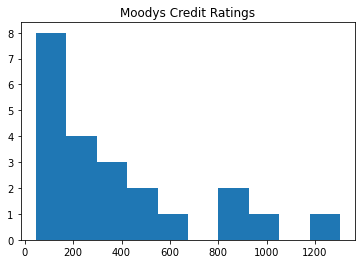

In [11]:
plt.hist(x)
plt.title('Moodys Credit Ratings')

<AxesSubplot:title={'center':'Moodys Credit Ratings'}>

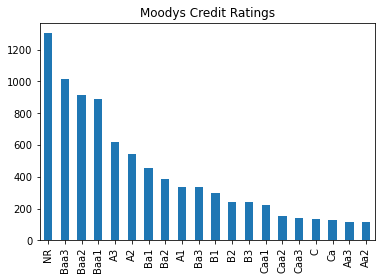

In [12]:
moody_mergent['RATING'].value_counts()[:20].plot(kind='bar', title='Moodys Credit Ratings' )

### (ii)S&P

<AxesSubplot:title={'center':'S&P Credit Ratings'}>

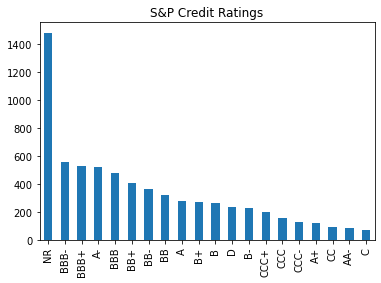

In [13]:
sp_mergent['RATING'].value_counts()[:20].plot(kind='bar', title='S&P Credit Ratings' )

### (iii)Fitch


<AxesSubplot:title={'center':'Fitch Credit Ratings'}>

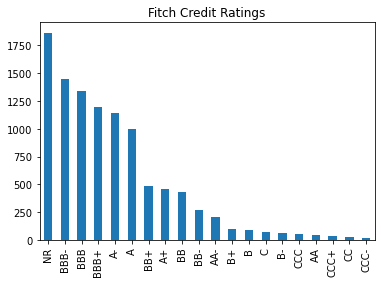

In [14]:
f_mergent['RATING'].value_counts()[:20].plot(kind='bar', title='Fitch Credit Ratings' )

## (c) Who is the most frequent issuer (based on the PROSPECTUS ISSUER NAME)?


In [15]:
print("The most frequent issuer and number of bonds is",mergent_ratings['PROSPECTUS_ISSUER_NAME'].value_counts().nlargest(1))

The most frequent issuer and number of bonds is OCCIDENTAL PETE CORP    279
Name: PROSPECTUS_ISSUER_NAME, dtype: int64


## (d) What is the maturity structure of the bonds issued by this company?


In [19]:
occ_mergent=mergent_ratings.query('PROSPECTUS_ISSUER_NAME=="OCCIDENTAL PETE CORP"')
occ_mergent.head()

,BOND_TYPE,COMPLETE_CUSIP,ISSUE_ID,RATING_TYPE,RATING_DATE,RATING,RATING_STATUS,REASON,RATING_STATUS_DATE,INVESTMENT_GRADE,ISSUER_ID,PROSPECTUS_ISSUER_NAME,ISSUER_CUSIP,ISSUE_CUSIP,ISSUE_NAME,MATURITY,OFFERING_DATE
549,CDEB,674599BM6,71966.0,FR,20200320.0,BB+,WNEG,DNG,NaN,NaN,3072.0,OCCIDENTAL PETE CORP,674599,BM6,SR DEB,20280401.0,19980402.0
550,CDEB,674599BM6,71966.0,FR,20200514.0,BB-,WNEG,DNG,NaN,NaN,3072.0,OCCIDENTAL PETE CORP,674599,BM6,SR DEB,20280401.0,19980402.0
551,CDEB,674599BM6,71966.0,FR,20200625.0,BB,Off,UPG,NaN,N,3072.0,OCCIDENTAL PETE CORP,674599,BM6,SR DEB,20280401.0,19980402.0
552,CDEB,674599BM6,71966.0,MR,20200318.0,Ba1,WNEG,DNG,NaN,NaN,3072.0,OCCIDENTAL PETE CORP,674599,BM6,SR DEB,20280401.0,19980402.0
553,CDEB,674599BM6,71966.0,MR,20200625.0,Ba2,WOFF,DNG,20200625.0,N,3072.0,OCCIDENTAL PETE CORP,674599,BM6,SR DEB,20280401.0,19980402.0


In [18]:

print("The time to maturity is 30 years")

The time to maturity is 30 years
